In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist # type: ignore

In [14]:
#Downloading the MNSIT training data

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [15]:
x_train = x_train.reshape(x_train.shape[0], -1) / 225.0
x_test = x_test.reshape(x_test.shape[0], -1) /225.0

In [16]:
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

In [17]:
y_train_encoded = one_hot_encode(y_train, 10)
y_test_encoded = one_hot_encode(y_test, 10)

In [18]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate = 0.01):
        # Init weights and biases for input to hidden layer
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))

        # Init weights and biases for hidden output layer
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01 # small random weights
        self.b2 = np.zeros((1, output_size)) # Biases initialized to 0

        self.learning_rate = learning_rate

    def softmax(self, x):
        # Compute softmax of the input for multi-class classifications
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True)) # For numerical stability
        return exp_x / np.sum(exp_x, axis=1, keepdims=True) # Normalize to get probabilities
    
    def forward(self, X):
        # Perform forward propagation
        self.z1 = np.dot(X, self.W1) + self.b1 # Linear combo for hidden layer
        self.a1 = np.tanh(self.z1) # Activation function for hidden layer (tanh)
        self.z2 = np.dot(self.a1, self.W2) + self.b2 # Linear combo for output layer
        self.a2 = self.softmax(self.z2) # Softmax activation for output layer
        return self.a2 # Return output probabilities
    
    def backward(self, X, y, output):
        # Backward propagation to update weights and biases
        m = X.shape[0]

        # Error calculation at the output layer
        output_error = output - y
        hidden_error = np.dot(output_error, self.W2.T) * (1 - np.tanh(self.z1) ** 2) # Derivative of tanh

        # Gradient computation
        dW2 = np.dot(self.a1.T, output_error) / m
        db2 = np.sum(output_error, axis=0, keepdims=True) / m
        dW1 = np.dot(X.T, hidden_error) / m
        db1 = np.sum(hidden_error, axis=0, keepdims=True) / m

        # Update weights and biases using gradient descent
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def train(self, X, y, epochs):
        # Train the NN for a specified number of epochs
        for epoch in range(epochs):
            output = self.forward(X) # Forward pass
            self.backward(X, y, output) # Backward pass

            # Print loss every 100 epochs
            if epoch % 100 == 0:
                loss = -np.mean(np.sum(y * np.log(output + 1e-10), axis=1))
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        # Make predictions for input data
        output = self.forward(X) # Forward pass to get output
        return np.argmax(output, axis=1) # Return the class with the highest probability

In [19]:
# Hypermeters
input_size = 784 # 28x28 pixels
hidden_size = 128 # No of neurons in hidden layer
output_size = 10 # 10 classes for digits 0-9
learning_rate = 0.01
epochs = 100

In [20]:
nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
nn.train(x_train, y_train_encoded, epochs)

Epoch 0, Loss: 2.3024


In [21]:
# Evaluate the model
predictions = nn.predict(x_test)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.6055


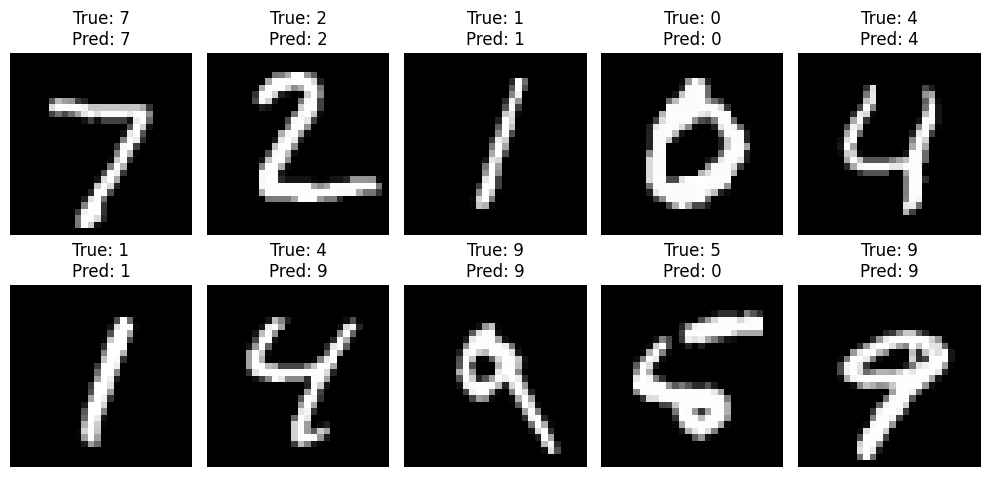

In [22]:
# Visualize some predictions
def plot_predictions(X, y_true, y_pred, num_images=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f'True: {y_true[i]}\nPred: {y_pred[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visialize predictions on test set
plot_predictions(x_test, y_test, predictions)